In [1]:
import os
import pandas as pd

directory = 'data'

rounds_df = pd.read_csv('{}/all_rounds.csv'.format(directory)).drop(['Unnamed: 0'], axis=1)
episodes_df = pd.read_csv('{}/all_.episodes.csv'.format(directory)).drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [2]:
# Quick cleanup

episodes_df.columns = ['baker', 'signature', 'technical', 'showstopper', 'round', 'theme', 'season']

episodes_df['round'] = pd.to_numeric(episodes_df['round'], errors='coerce')
# rounds_df['round'] = pd.to_numeric(rounds_df['round'])


episodes_df.sample()

,baker,signature,technical,showstopper,round,theme,season
61,Brendan,Potato and Pepper Pithivier,2.0,Family Reunion Chiffon Cake,9.0,patisserie,3


In [3]:
rounds_df['round'] = pd.to_numeric(rounds_df['round'])

rounds_df.sample()

,baker,season,round,outcome,eliminated,star baker,passed,favourite,least favourite,runner up,winner
872,Glenn,4,9,out,False,False,False,False,False,False,False


In [4]:
df = pd.merge(episodes_df, rounds_df, on=['baker', 'season', 'round'])

df

,baker,signature,technical,showstopper,round,theme,season,outcome,eliminated,star baker,passed,favourite,least favourite,runner up,winner
0,Brendan,Middle Eastern Taboon BreadIndian Rotis,4.0,Chocolate and Vanilla Bagels Cumin and Gruyere...,1,cakes,3,Baker got through to the next round,False,False,True,False,False,False,False
1,Cathryn,"Spiced Mango NaanLime, Coriander and Chilli To...",8.0,"Cranberry and Orange Bagels Chipotle, Chili, a...",1,cakes,3,Baker was one of the judges' favourite bakers...,False,False,False,True,False,False,False
2,Danny,Lime Coriander and Coconut TortillasZaatar Naa...,3.0,UNKNOWN,1,cakes,3,Baker got through to the next round,False,False,True,False,False,False,False
3,James,"Tomato, Garlic, and Parmesan FlatbreadsTattie ...",2.0,"Orange, Mint and Chocolate Bagels 'Millers' So...",1,cakes,3,Baker got through to the next round,False,False,True,False,False,False,False
4,John,"Coriander and Chilli RotisGarlic, Pomegranate ...",1.0,"Fig, Walnut and Gruyere Bagels Blueberry and W...",1,cakes,3,Baker got through to the next round,False,False,True,False,False,False,False
5,Manisha,Indian FlatbreadsItalian Flatbreads,6.0,UNKNOWN,1,cakes,3,Baker got through to the next round,False,False,True,False,False,False,False
6,Peter,Fennel and Nigella Seed NaanBannock Bread,11.0,Rosemary and Sea Salt Bagels Apple and Cinnamo...,1,cakes,3,Baker got through to the next round,False,False,True,False,False,False,False
7,Ryan,Shanghai Spring Onion FlatbreadsGarlic and Cor...,5.0,Cinnamon and Date Bagels Tarragon and Rosemary...,1,cakes,3,Baker got through to the next round,False,False,True,False,False,False,False
8,Sarah-Jane,Toasted Coconut and Lime RotisOatcakes,10.0,UNKNOWN,1,cakes,3,Baker got through to the next round,False,False,True,False,False,False,False
9,Stuart,Bombay BreadChorizo and Spring Onion Naan,9.0,Cinnamon and Cranberry Bagels Tomato and Thyme...,1,cakes,3,Baker was one of the judges' least favourite ...,False,False,False,False,True,False,False


In [5]:
df = df.drop(['signature', 'showstopper', 'outcome', 'season'], axis=1)

df

,baker,technical,round,theme,eliminated,star baker,passed,favourite,least favourite,runner up,winner
0,Brendan,4.0,1,cakes,False,False,True,False,False,False,False
1,Cathryn,8.0,1,cakes,False,False,False,True,False,False,False
2,Danny,3.0,1,cakes,False,False,True,False,False,False,False
3,James,2.0,1,cakes,False,False,True,False,False,False,False
4,John,1.0,1,cakes,False,False,True,False,False,False,False
5,Manisha,6.0,1,cakes,False,False,True,False,False,False,False
6,Peter,11.0,1,cakes,False,False,True,False,False,False,False
7,Ryan,5.0,1,cakes,False,False,True,False,False,False,False
8,Sarah-Jane,10.0,1,cakes,False,False,True,False,False,False,False
9,Stuart,9.0,1,cakes,False,False,False,False,True,False,False


In [6]:
import seaborn as sns
%matplotlib inline

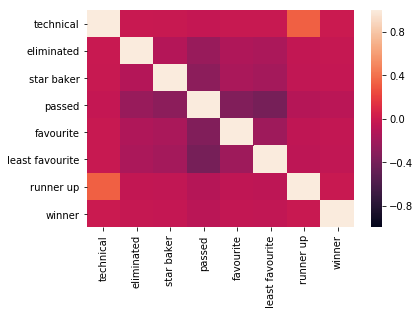

In [9]:
sns.heatmap(df.corr(), vmin=-1, vmax=1)

In [10]:
finalists = set(df[df['round']>8]['baker'])
winners = set(df[df['winner'] == True])

df['finalist'] = df['baker'].apply(lambda x: x in finalists)
df['winner'] = df['baker'].apply(lambda x: x in winners)

df = df.drop('baker', axis=1)

df = pd.get_dummies(df)
df = df.dropna()

df.head()

,technical,eliminated,star baker,passed,favourite,least favourite,runner up,winner,finalist,round_1.0,...,theme_pastry,theme_patisserie,theme_pies,theme_pudding,theme_puddings,theme_sweet dough,theme_tarts,theme_tea party,theme_tudor,theme_victorian
0,4.0,False,False,True,False,False,False,False,True,1,...,0,0,0,0,0,0,0,0,0,0
1,8.0,False,False,False,True,False,False,False,False,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,False,False,True,False,False,False,False,False,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,False,False,True,False,False,False,False,True,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,False,False,True,False,False,False,False,True,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn import svm

sub_df = df

X = sub_df.drop(['finalist', 'winner'], axis=1)
y = sub_df['finalist']
clf = svm.SVC()
clf.fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)